In [2]:
# Problem:
# This project understands how students performance(test score) is affected by few features such as
# gender, ethnicity, parental level of education, lunch and test preperatioin course

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("./data/stud.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
# Dataset Information: 
# Gender of students (Male/Female)
# Race/Ethnicity of students Group A,B,C,D,E
# Parental level of education(bachlers/masters/some college etc)
# Lunch (had lunch or not before test)
# Test preperation course - completed/not completed before test
# math score 
# reading score
# writing score

In [8]:
# Check missing values
# check duplicates
# check data types
# check the number of unique values of each column
# check stats of data
# check various categories present in different categorical column 

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.describe(include=object)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [27]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [19]:
print(df['gender'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())

['female' 'male']
['standard' 'free/reduced']
['none' 'completed']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [20]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']


In [23]:
print("length of numerical features",len(numeric_feature))
print(numeric_feature)

print("\nlength of categorical features",len(categorical_feature))
print(categorical_feature)

length of numerical features 3
['math_score', 'reading_score', 'writing_score']

length of categorical features 5
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [24]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['reading_score']
df['average_score'] = df['total_score']

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,216,216
1,female,group C,some college,standard,completed,69,90,88,249,249
2,female,group B,master's degree,standard,none,90,95,93,280,280
3,male,group A,associate's degree,free/reduced,none,47,57,44,161,161
4,male,group C,some college,standard,none,76,78,75,232,232


In [34]:
math_full = df[df['math_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]
reading_full = df[df['reading_score'] == 100].shape[0]


In [35]:
print(math_full)
print(writing_full)
print(reading_full)

7
14
17


In [37]:
# Visualization of target variable
# Histogram
# KDE

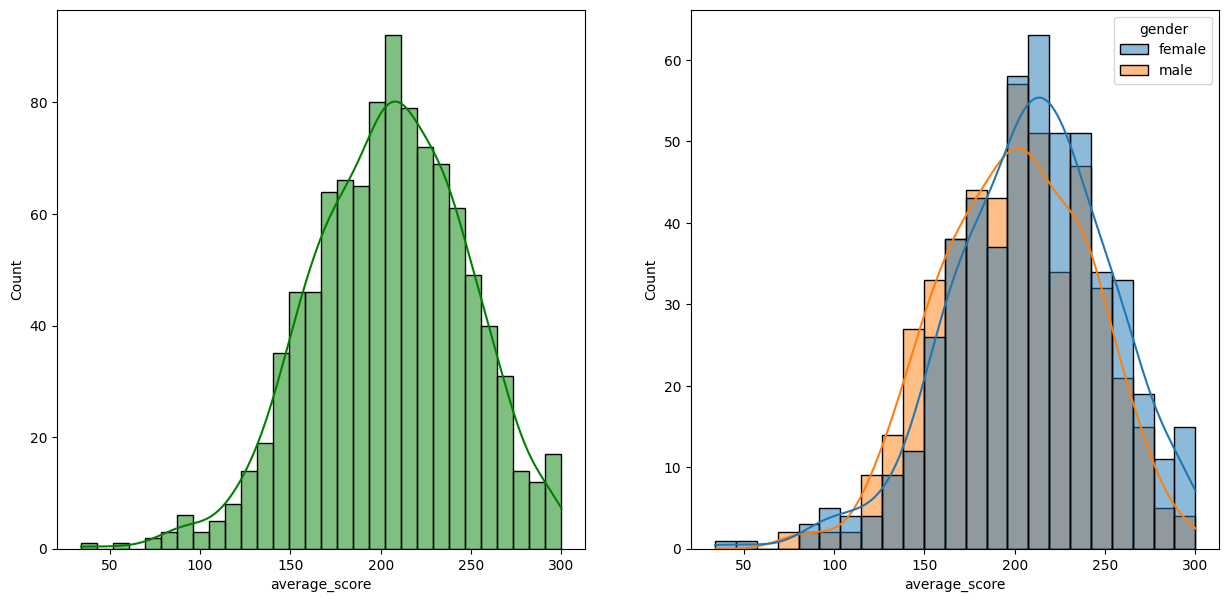

In [41]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

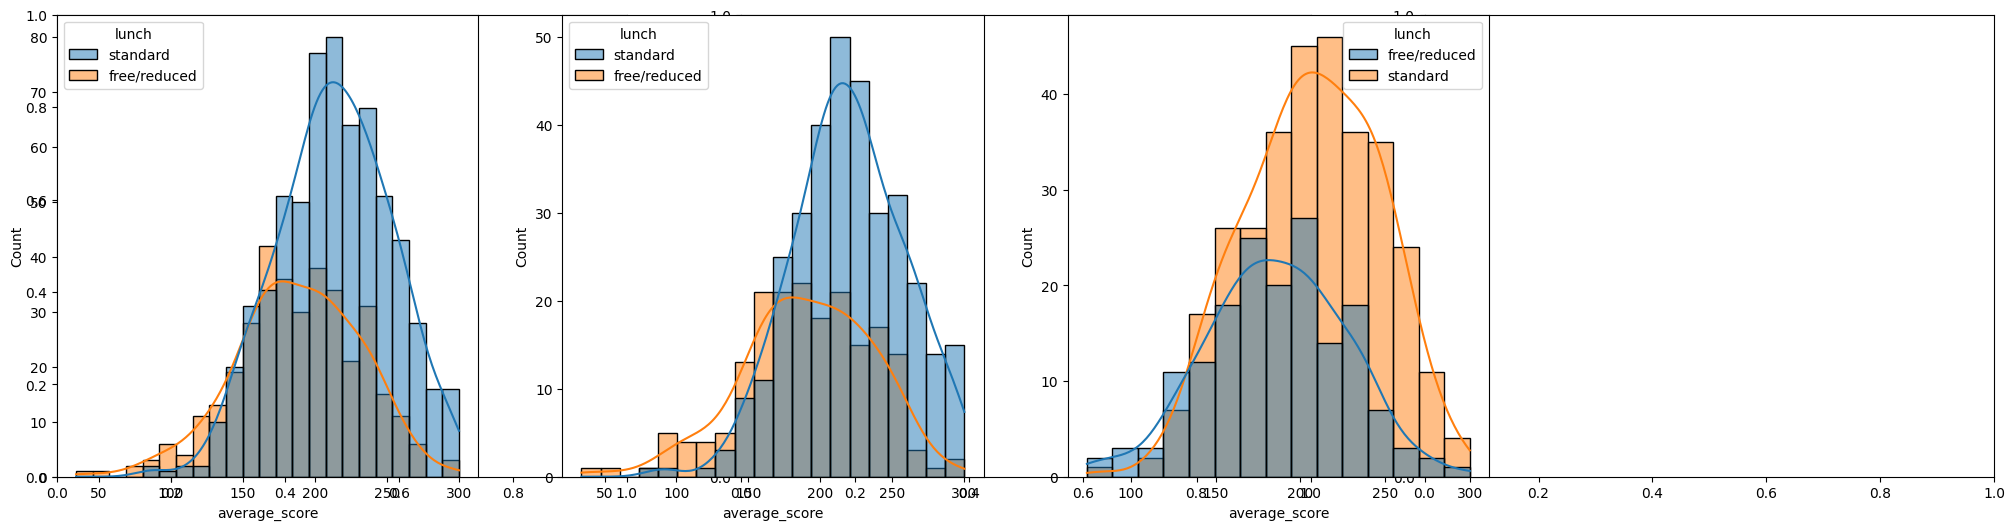

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

In [44]:
# Standard lunch helps perform well in exams.
# Standard lunch helps perform well in exams be it a male or a female.

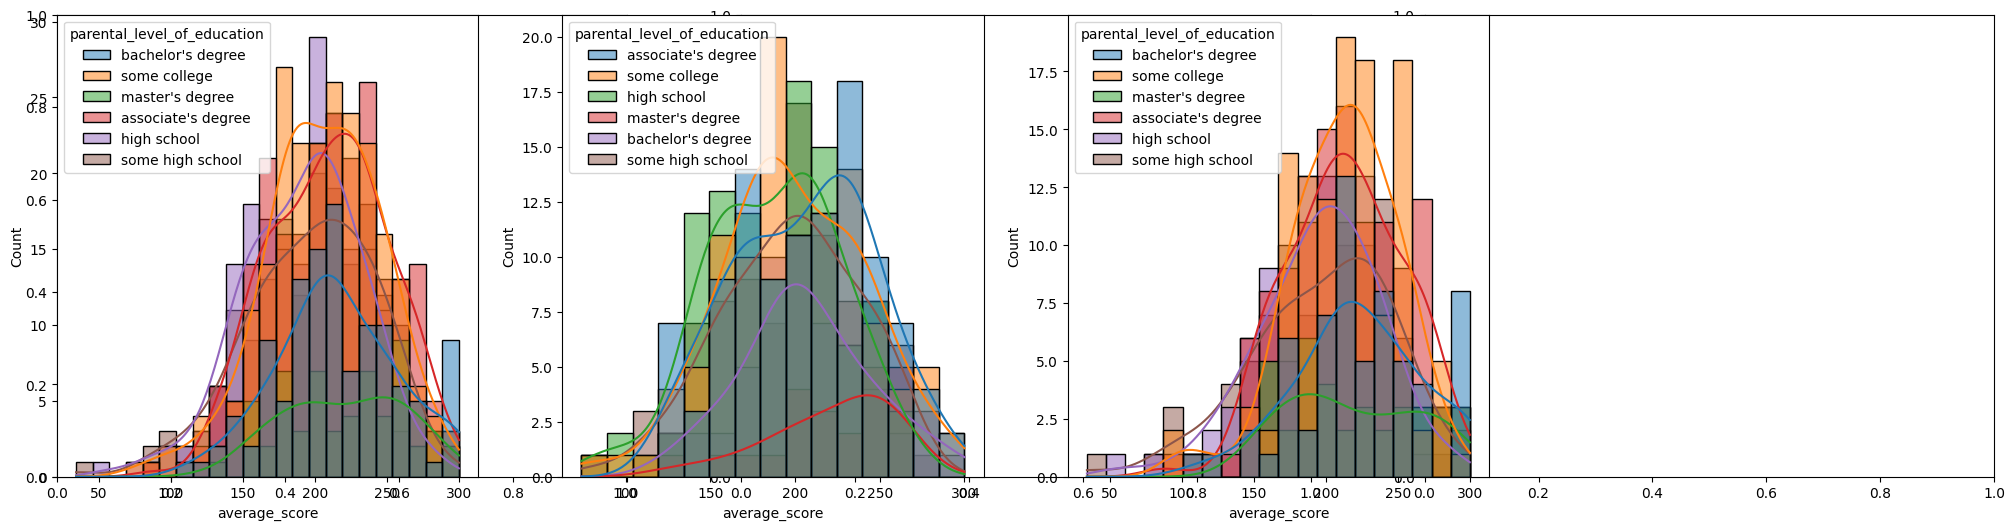

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

In [49]:
# In general parent's education don't help student perform well in exam.

# 2nd plot shows that parent's whose education is of 
# associate's degree or master's degree their male child tend to perform well in exam

# 3rd plot we can see there is no effect of parent's education on female students.

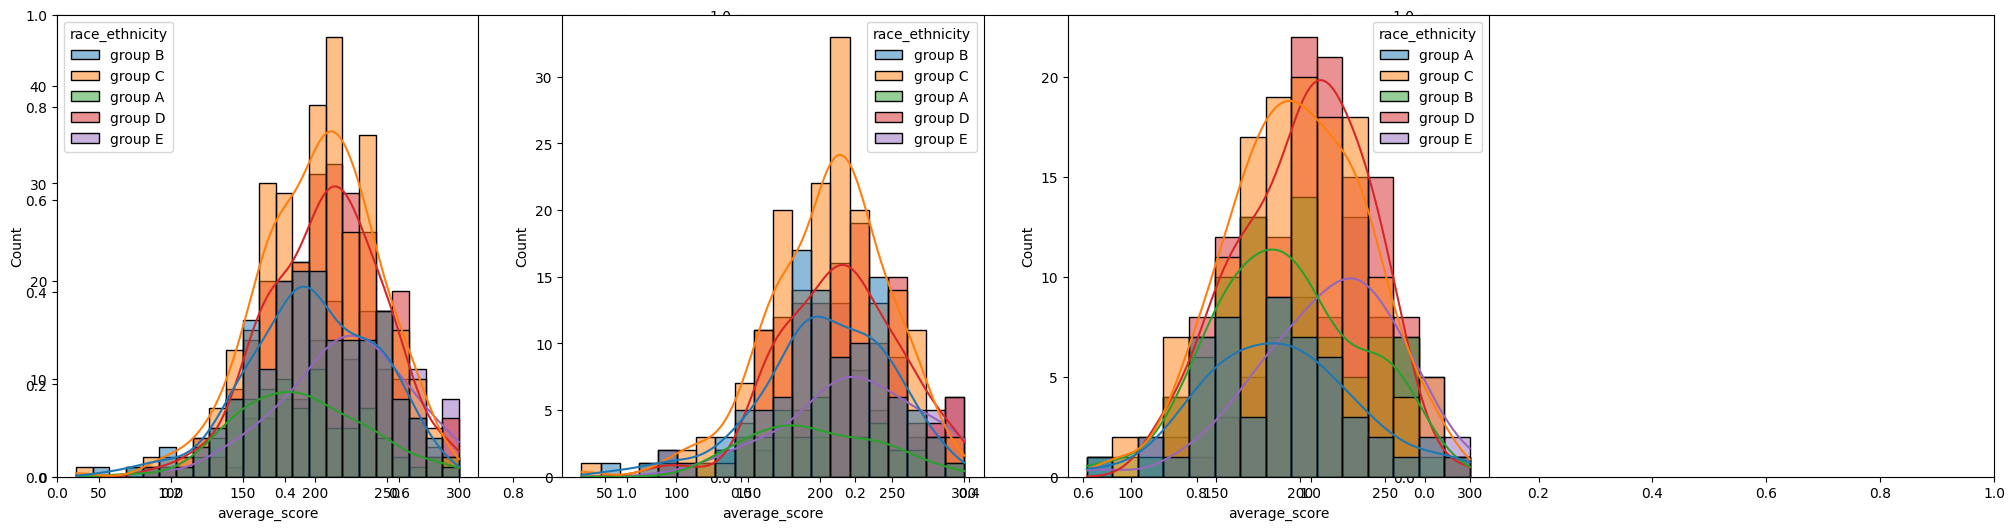

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

In [ ]:
# Students of group A and group B tends to perform poorly in exam.
# Students of group A and group B tends to perform poorly in exam
# irrespective of whether they are male or female

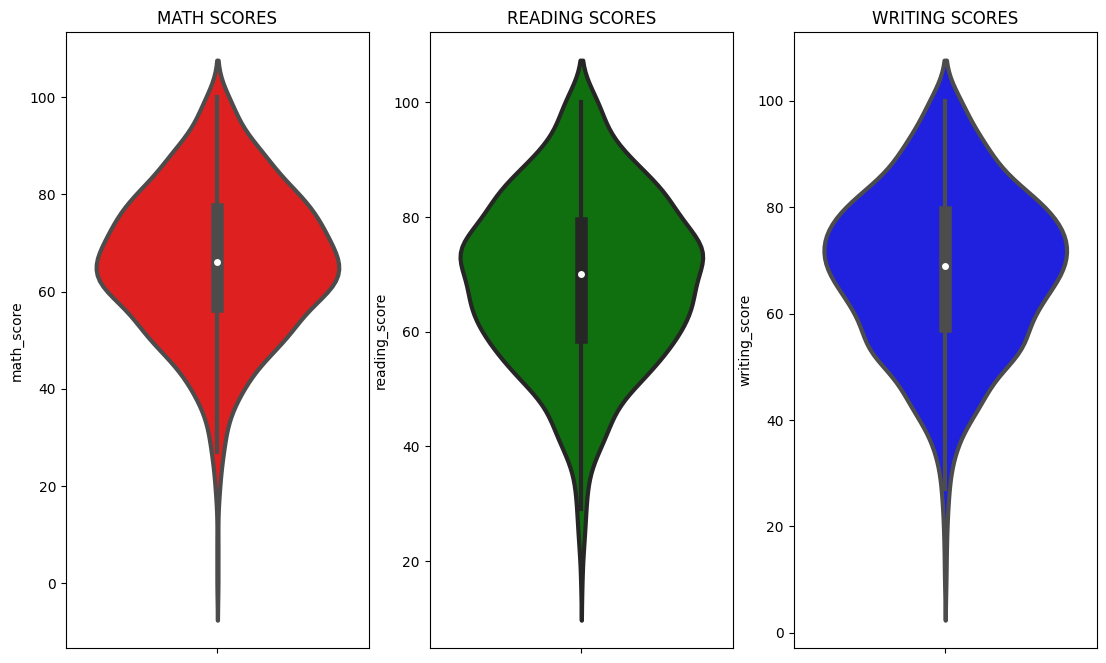

In [48]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [ ]:
# From the above three plots its clearly visible that most of the students score in between 60-80 
# in Maths whereas in reading and writing most of them score from 50-80

In [52]:
# Multivariate analysis

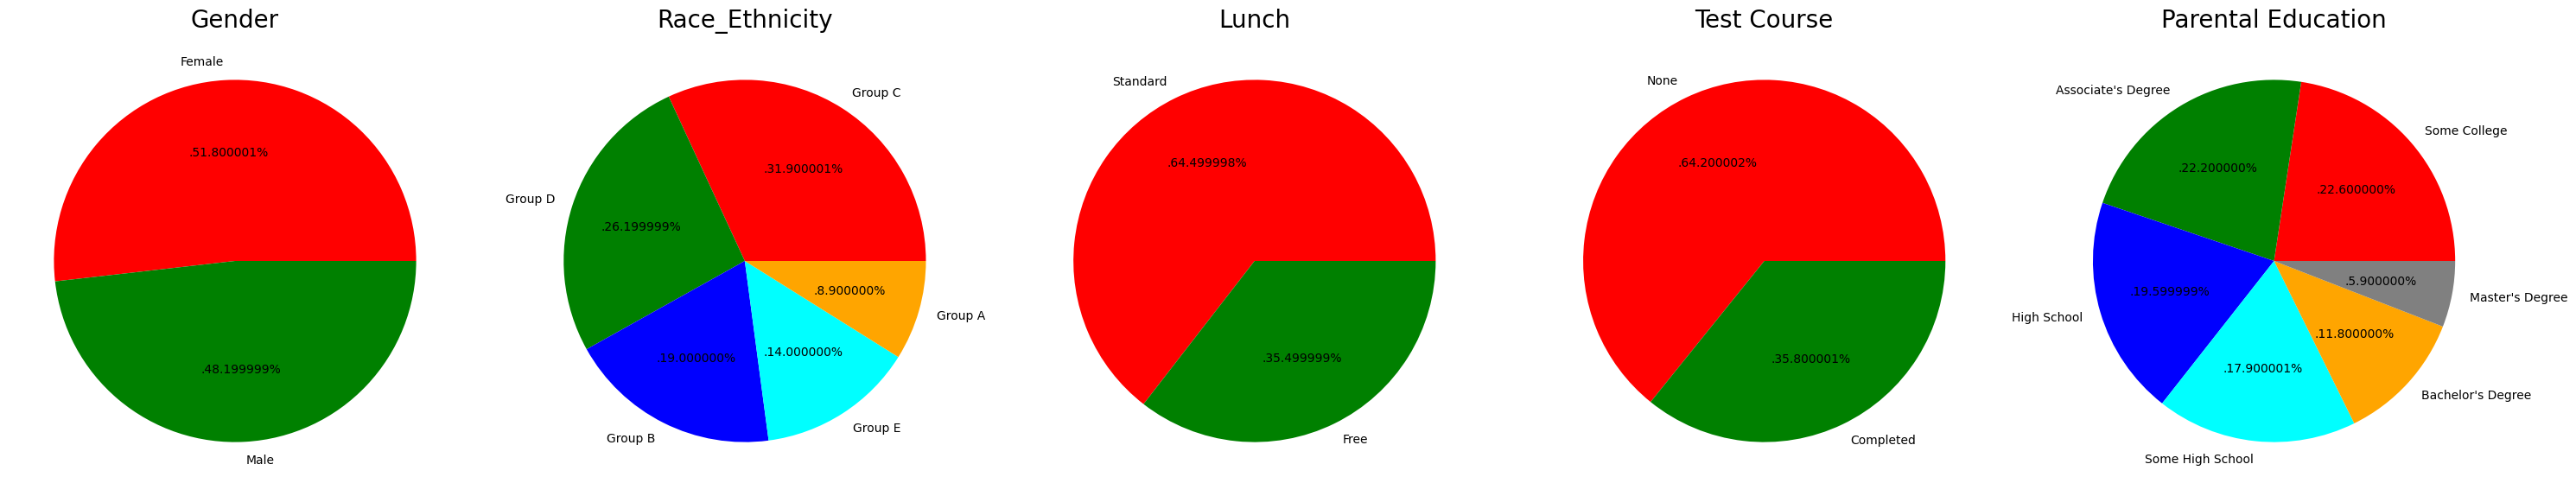

In [53]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [54]:
# Number of Male and Female students is almost equal
# Number students are greatest in Group C
# Number of students who have standard lunch are greater
# Number of students who have not enrolled in any test preparation course is greater
# Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

In [55]:
# Feature Wise Visualization

In [57]:
# UNIVARIATE ANALYSIS

In [58]:
# Gender

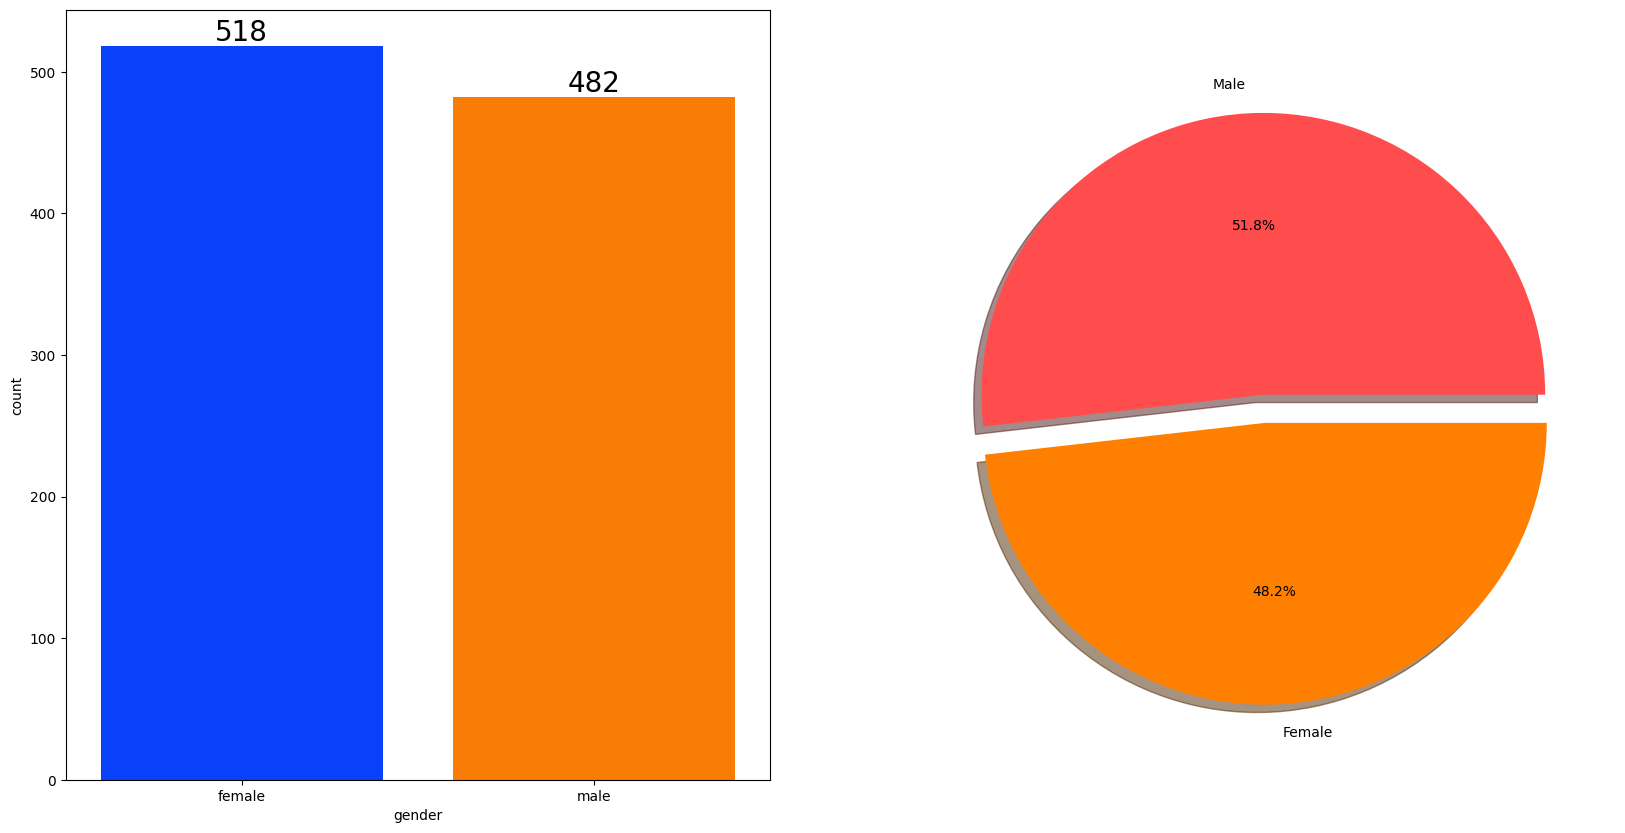

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [65]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,216,216
1,female,group C,some college,standard,completed,69,90,88,249,249
2,female,group B,master's degree,standard,none,90,95,93,280,280
3,male,group A,associate's degree,free/reduced,none,47,57,44,161,161
4,male,group C,some college,standard,none,76,78,75,232,232


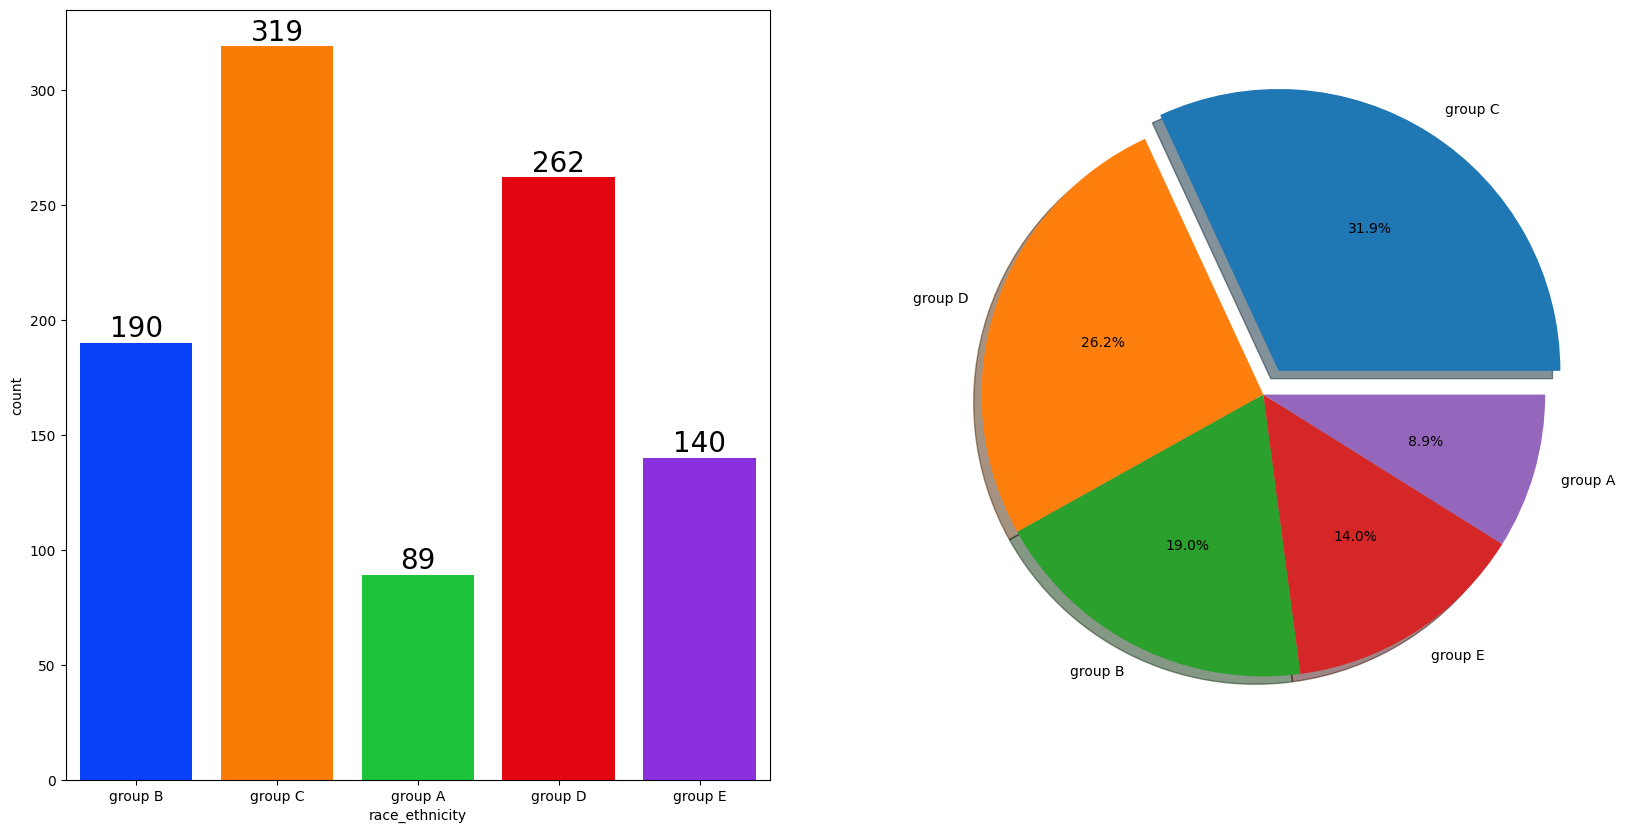

In [77]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

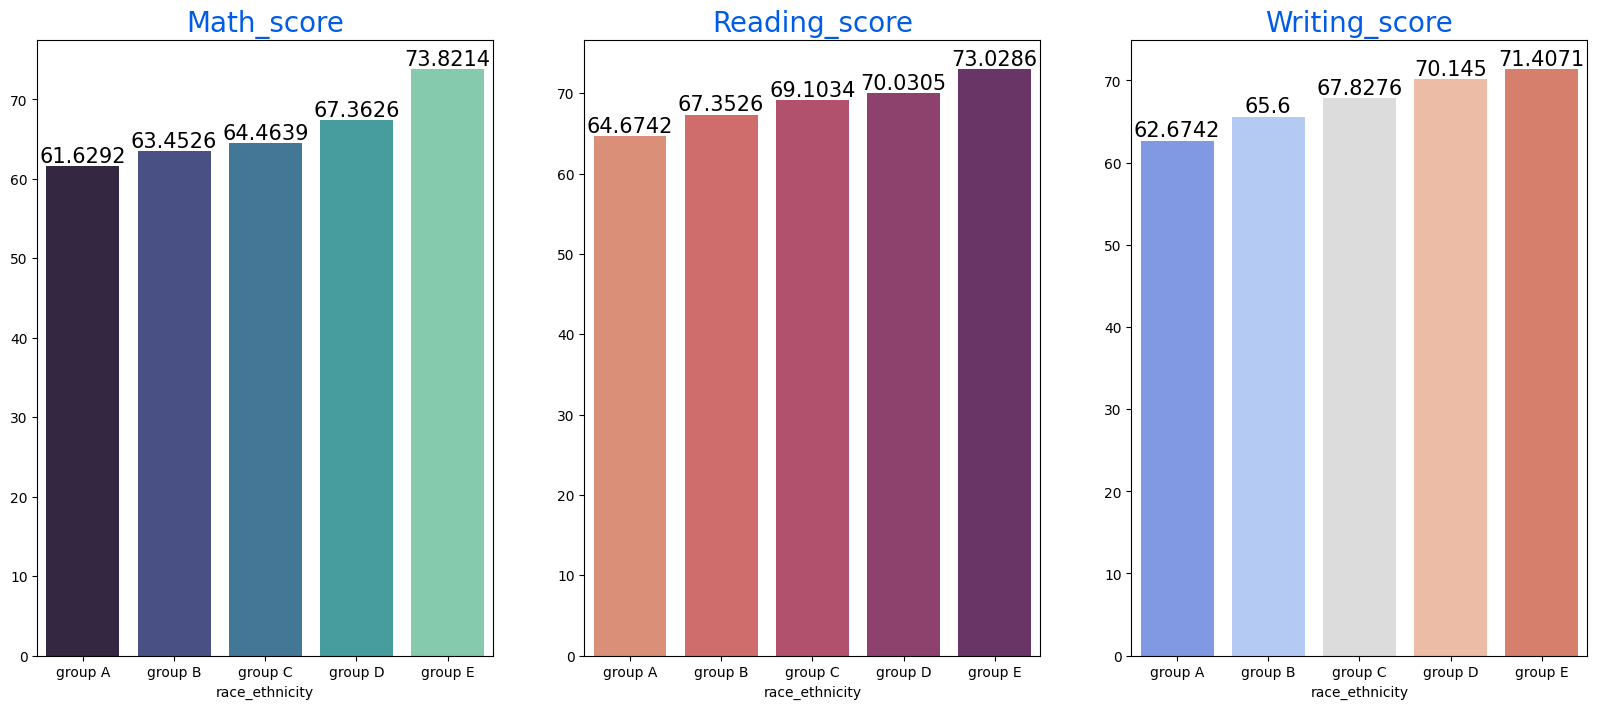

In [78]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

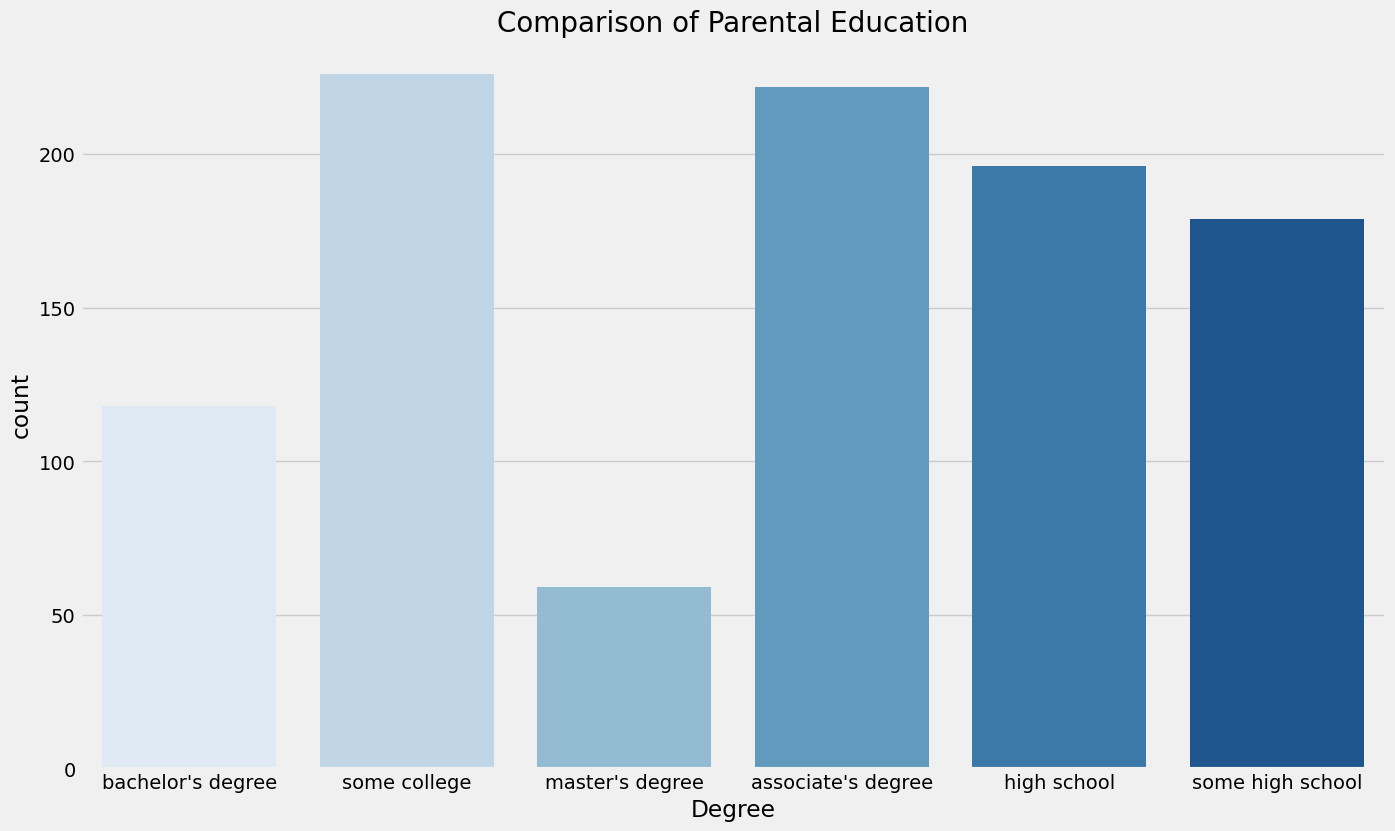

In [85]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],data=df, palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show() 

In [86]:
# Checking Outliers

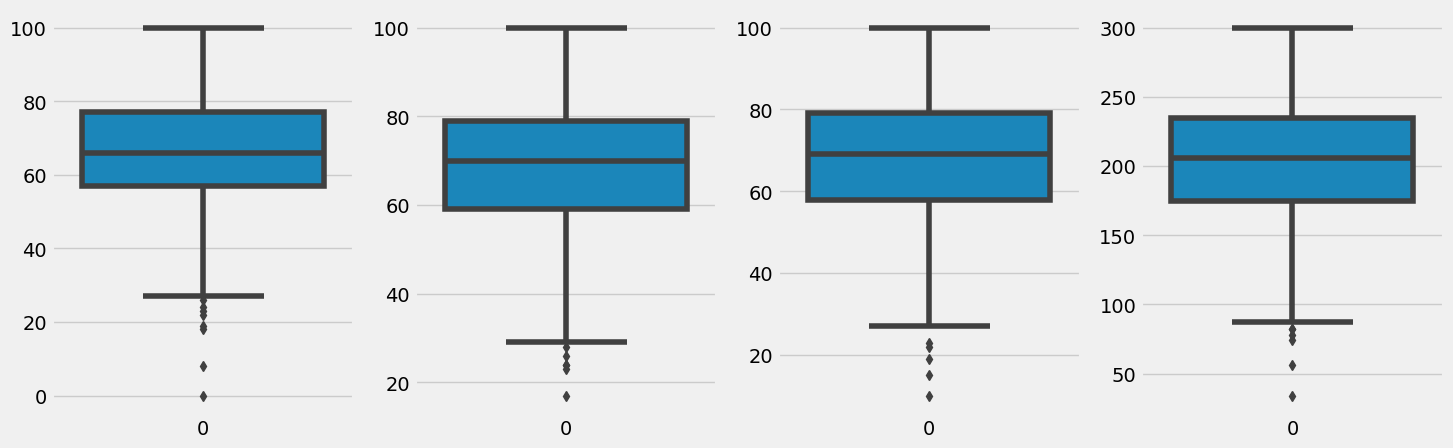

In [88]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'])
plt.subplot(142)
sns.boxplot(df['reading_score'])
plt.subplot(143)
sns.boxplot(df['writing_score'])
plt.subplot(144)
sns.boxplot(df['average_score'])
plt.show()

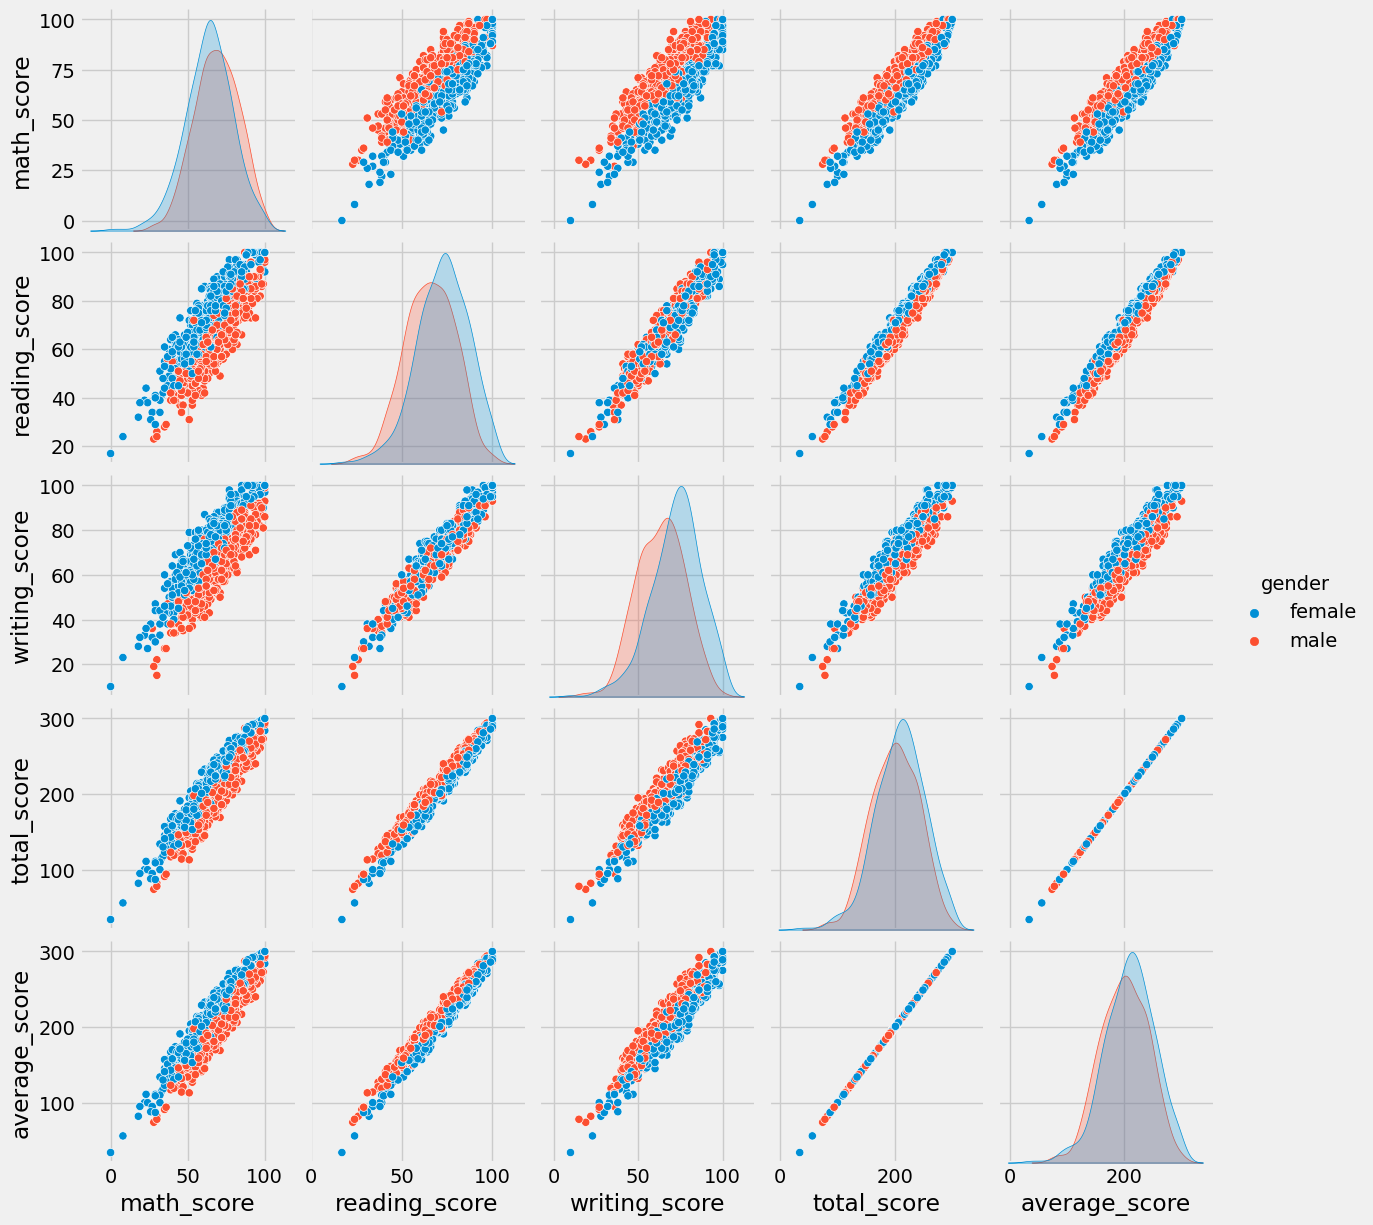

In [89]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [ ]:
# From the above plot it is clear that all the scores increase linearly with each other.

In [90]:
# Conclusion from EDA

# Student's Performance is related with lunch, race, parental level education
# Females lead in pass percentage and also are top-scorers
# Student's Performance is not much related with test preparation course
# Finishing preparation course is benefitial.